# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [56]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print('Male Height mean: ', male_df['Height'].mean())
print('Male Height sd: ', male_df['Height'].std(),'\n')

print('Male weight mean: ', male_df['Weight'].mean())
print('Male weight sd: ', male_df['Weight'].std(),'\n')

print('Female Height mean: ', female_df['Height'].mean())
print('Female Height sd: ', female_df['Height'].std(),'\n')

print('Female weight mean: ', female_df['Weight'].mean())
print('Female weight sd: ', female_df['Weight'].std(),'\n')
  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean:  69.02634590621741
Male Height sd:  2.863362228660647 

Male weight mean:  187.0206206581932
Male weight sd:  19.7811545167638 

Female Height mean:  63.70877360342507
Female Height sd:  2.696284015765054 

Female weight mean:  135.86009300746835
Female weight sd:  19.022467805319028 



#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized
.
.




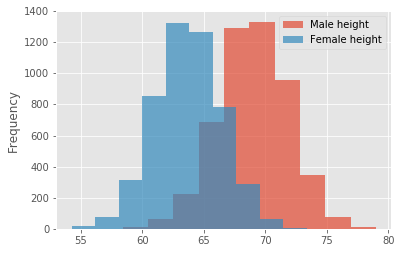

In [79]:
import seaborn as sns
binsize = 10
male_df.Height.plot.hist(bins = binsize, alpha = .7, label = 'Male height')
female_df.Height.plot.hist(bins = binsize, alpha = .7, label = 'Female height')
plt.legend()
             
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

(array([58.89718677, 59.87775046, 60.85831415, 61.83887783, 62.81944152,
        63.80000521, 64.78056889, 65.76113258, 66.74169627, 67.72225995,
        68.70282364, 69.68338733, 70.66395101, 71.6445147 , 72.62507838,
        73.60564207, 74.58620576, 75.56676944, 76.54733313, 77.52789682,
        78.5084605 ]),
 array([0.00040793, 0.00163171, 0.00367136, 0.00693479, 0.01325768,
        0.02447572, 0.04854351, 0.06649237, 0.09688305, 0.13094509,
        0.14053141, 0.13237284, 0.11462794, 0.10218612, 0.06220912,
        0.03814133, 0.0206004 , 0.00877047, 0.00489514, 0.00122379,
        0.00101982]))

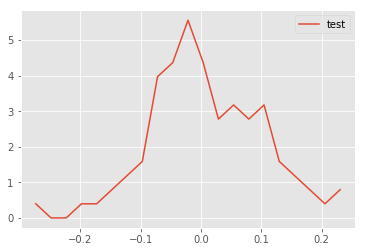

In [122]:
def density(x):
    n, bins = np.histogram(x, 21, density=1)
    n, bins

    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

density(male_df.Height)

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

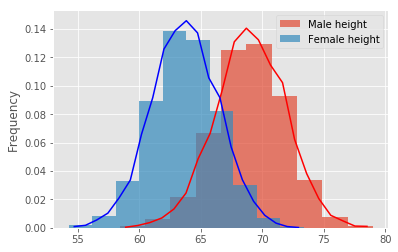

In [126]:
import seaborn as sns
binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True, alpha = .7, label = 'Male height')
female_df.Height.plot.hist(bins = binsize, density = True, alpha = .7, label = 'Female height')
a,b = density(male_df.Height)
plt.plot(a,b, 'r')
h,k = density(female_df.Height)
plt.plot(h,k, 'b' )

plt.legend()       
plt.show()

#### Repeat above exerice for male and female weights

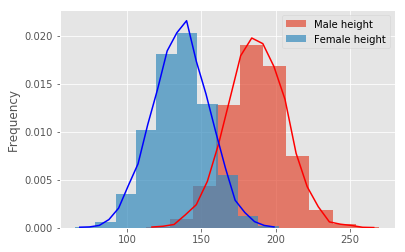

In [125]:
binsize = 10
male_df.Weight.plot.hist(bins = binsize, density = True, alpha = .7, label = 'Male height')
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = .7, label = 'Female height')
a,b = density(male_df.Weight)
plt.plot(a,b, 'r')
h,k = density(female_df.Weight)
plt.plot(h,k, 'b' )

plt.legend()       
plt.show()

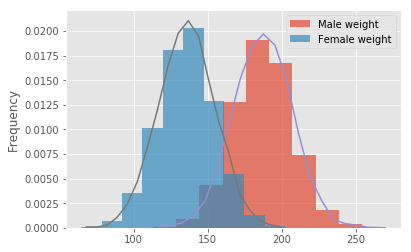

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


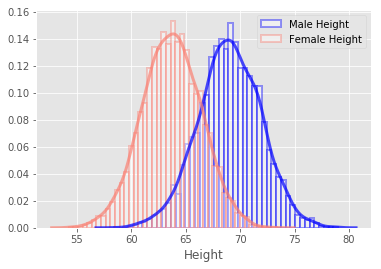

In [141]:
sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'blue',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Male Height",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                 })
sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Female Height",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "salmon",
                                  "alpha": 0.7,
                                 })



plt.legend()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


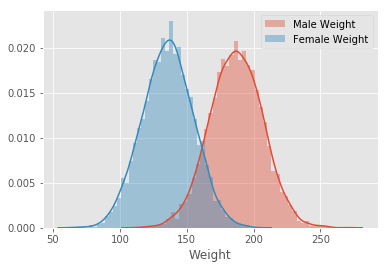

In [148]:
sns.distplot(male_df.Weight, label = 'Male Weight')
sns.distplot(female_df.Weight, label = 'Female Weight')
plt.legend()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.